In [33]:
using CairoMakie
using JLD2
using Oceananigans
using Statistics

In [13]:
include("src/turbulence_growth_checker.jl")
include("src/parameters.jl")

create_simulation_parameters (generic function with 2 methods)

In [14]:
sp = create_simulation_parameters(; Ek=1, Ri=0.6, Ro=3)
kernel = tgckernel(sp)

┌ Info: Created simulation parameters
│ Input:
│  Ro=3
│  Ri=0.6
│  Ek=1
│  α=0.25
│  λ=0.05
│  δ=-0.25
│  β=0.1
│ Output:
│  L=1
│  f=1
│  H=0.1
│  δH=-0.025
│  N₀=12.97286915703913
│  Nb=5.856079161053559
│  ℓ=0.25
│  ν=0.010000000000000002
│  Lz=0.25
│  κ=0.010000000000000002
└  B₀=0.34293663140525765


#31 (generic function with 1 method)

In [48]:
runname = "Ek05"
foldername = "../scratch/filament-instability/$runname"
filename = "down_front_mean.jld2"
fluxfilename = "turbulent_flux.jld2"

frames, grid = jldopen("$foldername/$filename") do file
    keys(file["timeseries/t"]), file["serialized/grid"]
    end;

xᶜᵃᵃ = xnodes(Center, grid)
xᶠᵃᵃ = xnodes(Face, grid)
zᵃᵃᶜ = znodes(Center, grid)
zᵃᵃᶠ = znodes(Face, grid)
Δzᵃᵃᶠ = grid.Δzᵃᵃᶠ[1:end-2]

fluxfile = jldopen("$foldername/$fluxfilename")
turbulence_check = map(frames) do frame
    ww = mean(fluxfile["timeseries/wFLUX/$frame"]; dims=1)[1, 1, :]
    sum(ww .* kernel.(1, 1, zᵃᵃᶠ) .* Δzᵃᵃᶠ)
end

close(fluxfile)

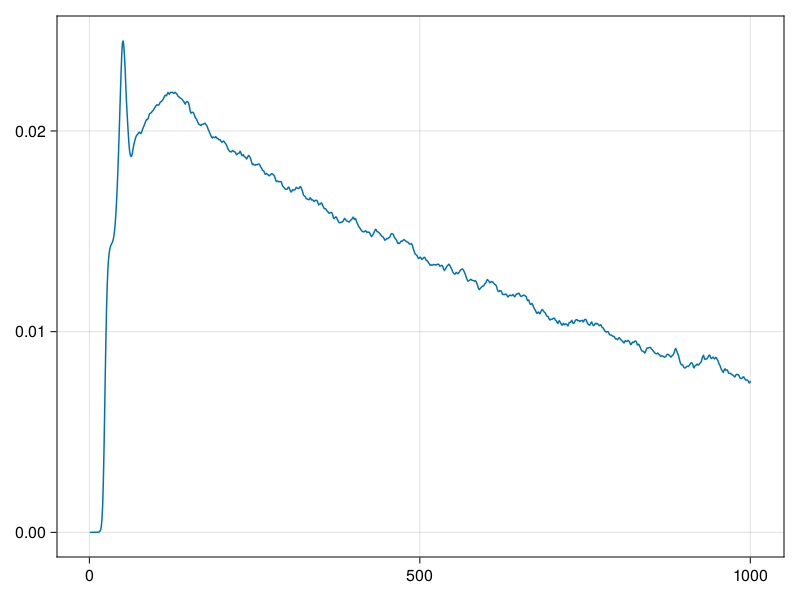

In [50]:
lines(turbulence_check)